# Neural Network Classification: MNIST Dataset

이 노트북에서는 **MNIST 손글씨 숫자 (0~9)** 데이터셋을 활용하여 신경망 분류 모델을 학습합니다.

## 목표
1. 데이터 불러오기 및 전처리
2. Neural Network 모델 정의
3. 학습 및 학습 곡선 확인
4. 성능 평가 및 예측 시각화


In [36]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'KoPubBatang'

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

## 1. 데이터 불러오기

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("원본 데이터 shape:", X_train.shape, y_train.shape)

원본 데이터 shape: (60000, 28, 28) (60000,)


## 2. 데이터 전처리

In [29]:
# 0~255 픽셀값 → 0~1 정규화
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# (28,28) → (784,) 벡터화
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("전처리 후 shape:", X_train.shape, y_train.shape)

전처리 후 shape: (60000, 784) (60000, 10)


## 3. 모델 정의

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(784,)),
    # TODO: 128개 뉴런, ReLU 활성화 함수
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # TODO: 128개 뉴런, ReLU 활성화 함수
    Dense(128, activation='relu'),
    # TODO: 10개 뉴런, Softmax 활성화 함수
    Dense(10, activation='softmax')
])

model.summary()

c:\project\대학원\패턴인식\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 컴파일

In [31]:
# TODO: Adam 옵티마이저, learning rate=0.001
# TODO: 손실함수: categorical_crossentropy (다중 클래스 분류)
# TODO: 평가지표: accuracy
optimizer = Adam(learning_rate=0.001)

In [33]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 5. 모델 학습

In [34]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9009 - loss: 0.3569 - val_accuracy: 0.9490 - val_loss: 0.1757
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9592 - loss: 0.1415 - val_accuracy: 0.9637 - val_loss: 0.1226
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9699 - loss: 0.0982 - val_accuracy: 0.9685 - val_loss: 0.1065
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9773 - loss: 0.0746 - val_accuracy: 0.9709 - val_loss: 0.0954
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9825 - loss: 0.0576 - val_accuracy: 0.9743 - val_loss: 0.0879
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9859 - loss: 0.0468 - val_accuracy: 0.9711 - val_loss: 0.0996
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9898 - loss: 0.0361 - val_accuracy: 0.9723 - val_loss: 0.0951
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.

## 6. 학습 곡선 확인

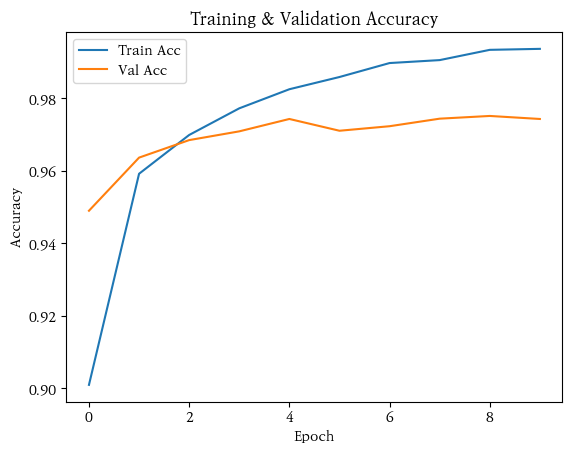

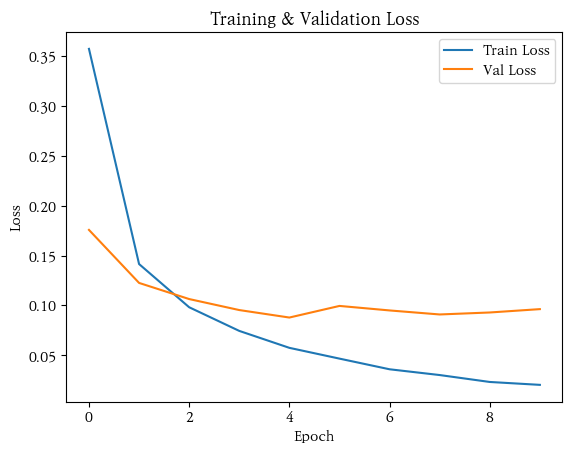

In [37]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 7. 모델 평가

In [38]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.3f}")

테스트 정확도: 0.975


## 8. 예측 예시 시각화

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


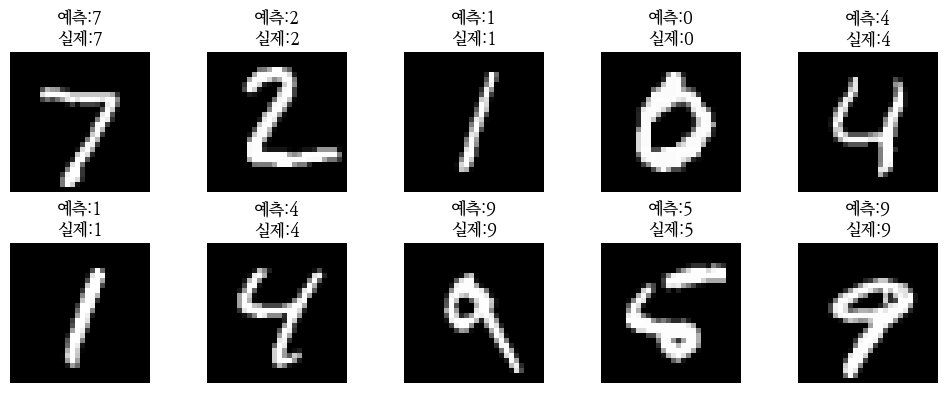

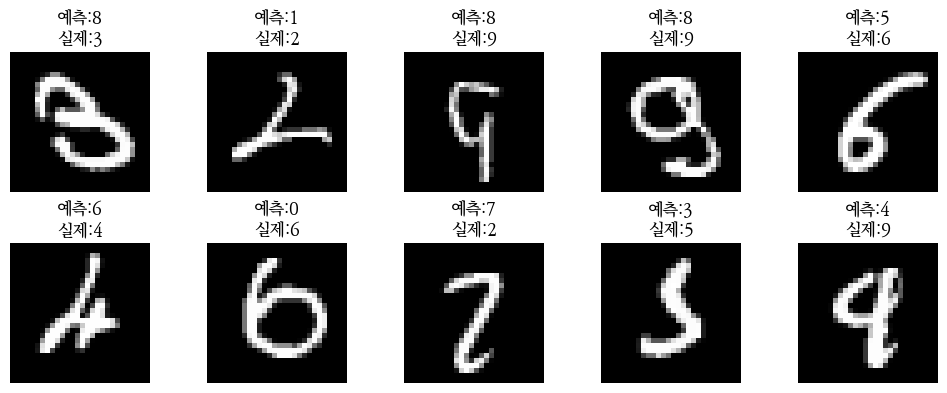

In [39]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

idx = 0
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i+idx].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[i+idx]}\n실제:{y_true[i+idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

failed = y_pred_classes != y_true
failed_idx = np.where(failed)[0]
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[failed_idx[i]].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[failed_idx[i]]}\n실제:{y_true[failed_idx[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


## 생각해보기
- Training/Validation Graph 에서 과적합(overfitting) 징후가 보이나?

valid set의 loss가 train보다 어느순간 떨어지지않음 과적합징후 보임